In [1]:
%matplotlib inline
#load modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.io import fits
from  matplotlib.colors import LogNorm
import scipy.ndimage

# MagAO-X function definitions
import magaoxFunctions as mf
# draw the dark hole regions
from skimage.draw import draw

# PSD code
from scipy import signal
import h5py
import copy
import PSD_defns as psd

In [4]:
# 2 inch flats (8 total)

ca_val = 80
dr_width = 5

ntot_2 = 8 # goes from 1-8
D_full_2 = 50.8*u.mm
npix_diam_2 = []
var_2 = []

print('Crunching PSDs for 2 inch flats ({} total mirrors)'.format(ntot_2))

for ntest in range(0,ntot_2):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/2in_n{}_mediansurface.fits'.format(ntest+1)
    
    # pass in the data for generating PSD content
    (kval, mean_val, npix_diam, ap_var) = psd.calc_PSD(surf_loc, D_full_2, ca_val, dr_width)
    
    print('Finished calculating PSD for surface {}'.format(ntest))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if ntest == 0:
        kval_2 = np.zeros((ntot_2, np.shape(kval)[0]))
        mean_psd_2 = np.zeros((ntot_2, np.shape(mean_val)[0]))
    
    kval_2[ntest,:] = copy.copy(kval)
    mean_psd_2[ntest,:] = copy.copy(mean_val)
    npix_diam_2.append(npix_diam)
    var_2.append(ap_var)

Crunching PSDs for 2 inch flats (8 total mirrors)
Finished calculating PSD for surface 0
Finished calculating PSD for surface 1
Finished calculating PSD for surface 2
Finished calculating PSD for surface 3
Finished calculating PSD for surface 4
Finished calculating PSD for surface 5
Finished calculating PSD for surface 6
Finished calculating PSD for surface 7


In [51]:
npix_diam_2

[450, 450, 450, 450, 450, 450, 450, 450]

In [52]:
for ntest in range(0,ntot_2):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/2in_n{}_mediansurface.fits'.format(ntest+1)
    surf_data = fits.getdata(surf_loc)*u.um * u.mm / (1e3*u.um) # convert to mm
    print(np.shape(surf_data))

(564, 564)
(564, 564)
(564, 564)
(564, 564)
(564, 564)
(564, 564)
(564, 564)
(564, 564)


## Build the PSD plots

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

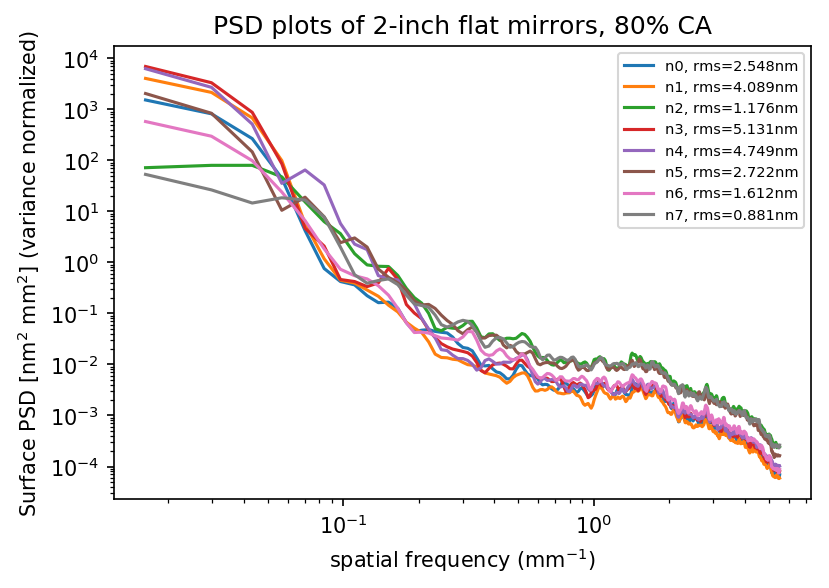

In [5]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
rms_2 = np.sqrt(var_2)*1e6 # converts mm to nm
plt.figure(dpi=150)
for ns in range(0,ntot_2):
    plt.loglog(kval_2[ns,:], [i*1e12 for i in mean_psd_2[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_2[ns]))
plt.title('PSD plots of 2-inch flat mirrors, 80% CA')
plt.legend(prop={'size':7})
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

In [45]:
np.shape(kval_2)

(8, 408)

In [42]:
#find as close to kval=1
rx=np.abs(kval_2-1)
np.where(rx==np.amin(rx))
kval_2[0][73]

1.0029349740095965

In [50]:
t=np.where(rx==np.amin(rx))
t[1][1]

73

In [44]:
mean_psd_2[0][73]*1e12

0.003132368380531844

Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

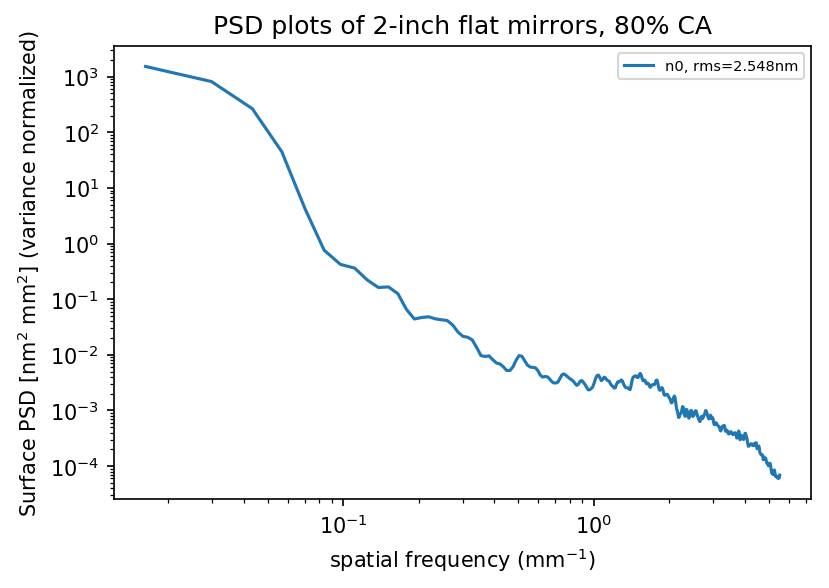

In [13]:
plt.figure(dpi=150)
ns=0
plt.loglog(kval_2[ns,:], [i*1e12 for i in mean_psd_2[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_2[ns]))
plt.title('PSD plots of 2-inch flat mirrors, 80% CA')
plt.legend(prop={'size':7})
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

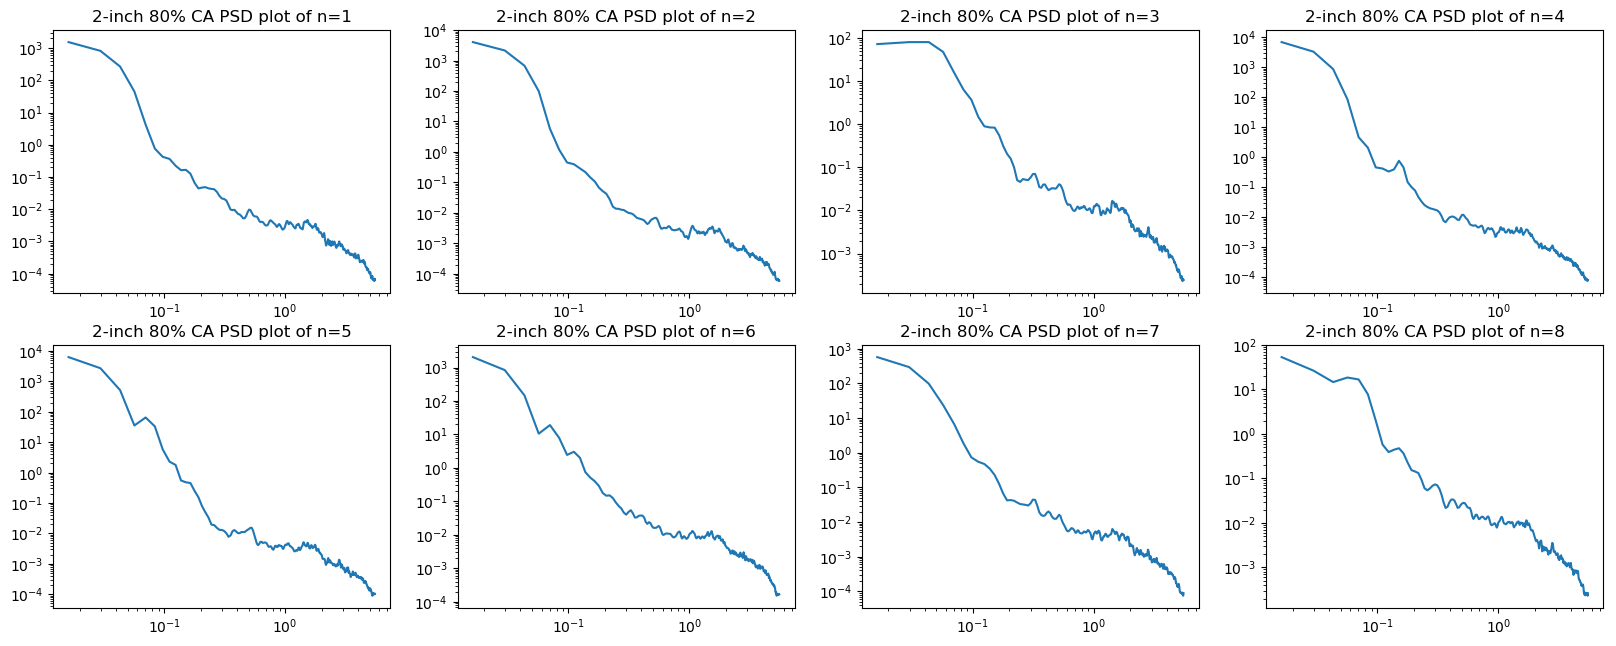

In [28]:
fig, axs = plt.subplots(2,4,figsize=[20,7], dpi=100)
#fig.suptitle('Individual PSDs for 2-inch flats')
axs = axs.ravel()
for ns in range(0,ntot_2):
    axs[ns].loglog(kval_2[ns,:], [i*1e12 for i in mean_psd_2[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_2[ns]))
    axs[ns].set_title('2-inch 80% CA PSD plot of n={}'.format(ns+1    if ntest < 5:
#         new_loc = 'zygo_data/oaps/OAP{}_Pre-Coat_fixed.fits'.format(ntest)
#     else:
#         new_loc = 'zygo_data/oaps/OAP5_SN0{}_Pre-Coat_fixed.fits'.format(snum)
    
#     fits.writeto(new_loc, mask_oap, optic_header)))
    #axs[ns].xlabel('spatial frequency (mm$^{-1}$)')
    #axs[ns].ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 
fig.subplots_adjust(top=0.95)

## What if the flats were at 50% CA?

In [26]:
# 2 inch flats (8 total)

ca_val = 50
dr_width = 5

ntot_2_50 = 8 # goes from 1-8
D_full_2_50 = 50.8*u.mm
npix_diam_2_50 = []
var_2_50 = []

print('Crunching PSDs for 2 inch flats ({} total mirrors at {}% CA)'.format(ntot_2_50, ca_val))

for ntest in range(0,ntot_2_50):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/2in_n{}_mediansurface.fits'.format(ntest+1)
    
    # pass in the data for generating PSD content
    (kval, mean_val, npix_diam, ap_var) = psd.calc_PSD(surf_loc, D_full_2_50, ca_val, dr_width)
    
    print('Finished calculating PSD for surface {}'.format(ntest+1))
    # if this is the first loop, initialize variables.
    # There's gotta be a smarter way to do this.
    if ntest == 0:
        kval_2_50 = np.zeros((ntot_2_50, np.shape(kval)[0]))
        mean_psd_2_50 = np.zeros((ntot_2_50, np.shape(mean_val)[0]))
    
    kval_2_50[ntest,:] = copy.copy(kval)
    mean_psd_2_50[ntest,:] = copy.copy(mean_val)
    npix_diam_2_50.append(npix_diam)
    var_2_50.append(ap_var)

Crunching PSDs for 2 inch flats (8 total mirrors at 50% CA)
Finished calculating PSD for surface 1
Finished calculating PSD for surface 2
Finished calculating PSD for surface 3
Finished calculating PSD for surface 4
Finished calculating PSD for surface 5
Finished calculating PSD for surface 6
Finished calculating PSD for surface 7
Finished calculating PSD for surface 8


Text(0, 0.5, 'Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)')

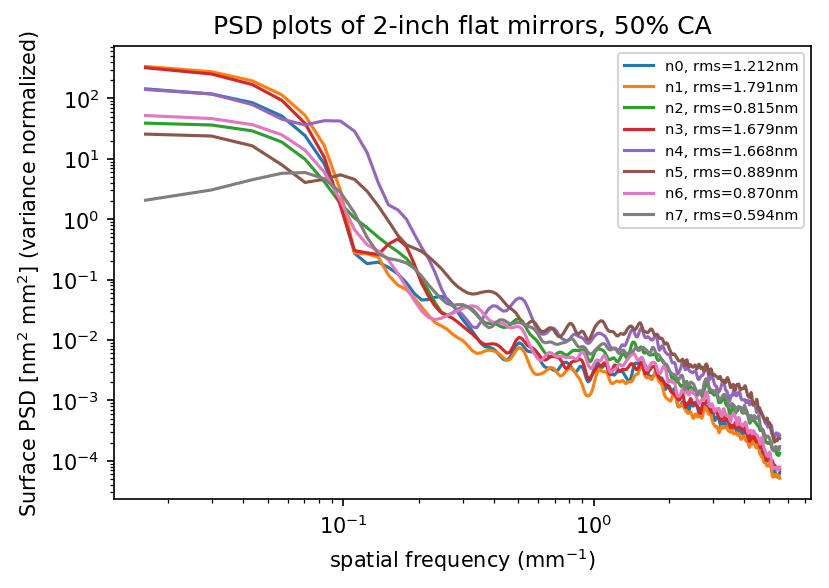

In [27]:
# convert mean from mm^2 mm^2 to nm^2 mm^2
#mean_val_nm2 = [i*1e12 for i in mean_psd_arr[0,:]]
rms_2_50 = np.sqrt(var_2_50)*1e6 # converts mm to nm
plt.figure(dpi=150)
for ns in range(0,ntot_2_50):
    plt.loglog(kval_2_50[ns,:], [i*1e12 for i in mean_psd_2_50[ns,:]], label='n{}, rms={:.3f}nm'.format(ns, rms_2_50[ns]))
plt.title('PSD plots of 2-inch flat mirrors, {}% CA'.format(ca_val))
plt.legend(prop={'size':7})
plt.xlabel('spatial frequency (mm$^{-1}$)')
plt.ylabel('Surface PSD [nm$^{2}$ mm$^{2}$] (variance normalized)') 

## Troubleshooting padding issues

In [20]:
# 2 inch flats (8 total)

ca_val = 80
dr_width = 5

ntot_2 = 1 # goes from 1-8
D_full_2 = 50.8*u.mm
npix_diam_2 = []
var_2 = []

print('Crunching PSDs for 2 inch flats ({} total mirrors)'.format(ntot_2))

for ntest in range(0,ntot_2):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/2in_n{}_mediansurface.fits'.format(ntest+1)
    
    file_loc=surf_loc
    full_diam = D_full_2
    ca_percent = ca_val
    
    
    # call in the data
    optic, optic_header = fits.getdata(file_loc, header=True)
    
    # check if the optics are same shape. 
    # if not same shape, cut down the edges of where there would be extra zeros.
    if np.shape(optic)[0] < np.shape(optic)[1]:
        diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
        optic_data = optic[:,np.int(diff/2):np.shape(optic)[1]-np.int(diff/2)]
    elif np.shape(optic)[0] > np.shape(optic)[1]:
        diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
        optic_data = optic[np.int(diff/2):np.shape(optic)[0]-np.int(diff/2),:]
    else:
        optic_data=optic
    
    # convert the data from um to mm
    optic_data *= 1e-3
    
    # Create the clear aperture mask based on the clear aperture percent
    data_side = np.shape(optic_data)[0]
    ap_clear = np.zeros((data_side, data_side), dtype=np.uint8)
    ca_coords = draw.circle(data_side/2, data_side/2, radius=(data_side/2)*(ca_percent/100))
    ap_clear[ca_coords] = True
    npix_diam = np.int(data_side*ca_percent/100)
    if npix_diam %2 != 0: # if odd
        npix_diam -= 1
    print('80% CA pix diam: {}'.format(npix_diam))
    
    # calculate the mean and variance of the active region of data
    ap_active = optic_data * ap_clear
    ap_active_coords = optic_data[ap_clear==True]
    ap_avg = np.mean(ap_active_coords)
    ap_var = np.var(ap_active_coords)
    
    # Subtract the mean from the data
    ap_submean = (ap_active - ap_avg) * ap_clear
    
    # build the Hann 2D window
    hannWin = psd.han2d((npix_diam, npix_diam))
    # zero-pad the window to fit with the full aperture dimensions
    pad_side = np.int((np.shape(optic_data)[0] - npix_diam)/2)
    print('padding side pixel length: {}'.format(pad_side))
    # Only works if pad_side is even, so add 1 if it's odd (won't change much)
    #if pad_side % 2 != 0:
        #pad_side += 1
    #print('check if resized padding side length: {}'.format(pad_side))
    
    # Apply the padding onto the window
    pad_hann = np.pad(hannWin, pad_side, mf.pad_with)
    if np.shape(pad_hann)[0] != np.shape(ap_clear)[0]:
        print('ap_clear ({}) and pad_hann ({}) do not match'.format(np.shape(ap_clear)[0], np.shape(pad_hann)[0]))
    else:
        print('ap_clear ({}) and pad_hann ({}) do match, yay'.format(np.shape(ap_clear)[0], np.shape(pad_hann)[0]))

Crunching PSDs for 2 inch flats (1 total mirrors)
80% CA pix diam: 450
padding side pixel length: 57
ap_clear (564) and pad_hann (564) do match, yay


## Investigating shapes of arrays
All content here is notes and nothing useful, maybe.

In [26]:
ntot_1in = 8 # goes from 1-8
data_shape_arr = []
new_optic_arr = []
for ntest in range(0,ntot_1in):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/1in_n{}_mediansurface.fits'.format(ntest+1)
    optic, optic_header = fits.getdata(surf_loc, header=True)
    
    # if the optics are not the same shape, cut down the edges of where there would be extra zeros.
    if np.shape(optic)[0] < np.shape(optic)[1]:
        diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
        new_optic = optic[:,np.int(diff/2):np.shape(optic)[1]-np.int(diff/2)]
    elif np.shape(optic)[0] > np.shape(optic)[1]:
        diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
        new_optic = optic[np.int(diff/2):np.shape(optic)[0]-np.int(diff/2),:]
    else:
        new_optic=optic
    
    new_optic_arr.append(np.shape(new_optic))


In [27]:
data_shape_arr

[(276, 276),
 (276, 280),
 (276, 280),
 (276, 276),
 (276, 280),
 (276, 280),
 (280, 276),
 (280, 276)]

In [28]:
new_optic_arr

[(276, 276),
 (276, 276),
 (276, 276),
 (276, 276),
 (276, 276),
 (276, 276),
 (276, 276),
 (276, 276)]

In [24]:
surf_loc = 'zygo_data/flat_mirrors/median_combined/1in_n2_mediansurface.fits'.format(ntest+1)
optic, optic_header = fits.getdata(surf_loc, header=True)
np.shape(optic)

(276, 280)

In [25]:
if np.shape(optic)[0] < np.shape(optic)[1]:
    diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
    new_optic = optic[:,np.int(diff/2):np.shape(optic)[1]-np.int(diff/2)]
elif np.shape(optic)[0] > np.shape(optic)[1]:
    diff = np.int(np.abs(np.shape(optic)[0] - np.shape(optic)[1]))
    new_optic = optic[np.int(diff/2):np.shape(optic)[0]-np.int(diff/2),:]
else:
    new_optic=optic
np.shape(new_optic)

(276, 276)

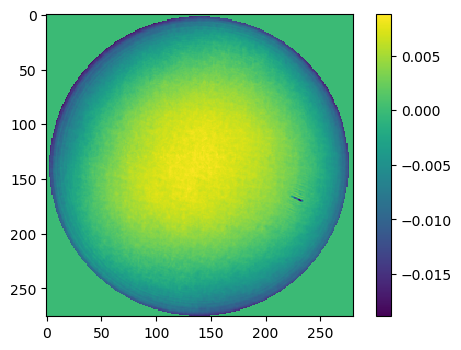

In [18]:
plt.figure(dpi=100)
plt.imshow(optic)
plt.colorbar()

In [19]:
optic_data = psd.zeroPadSquare(optic)
np.shape(optic_data)

(280, 280)

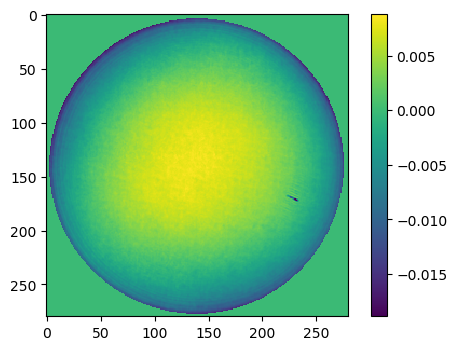

In [20]:
plt.figure(dpi=100)minimum
plt.imshow(optic_data)
plt.colorbar()

In [5]:
ntot_2in = 8 # goes from 1-8
data_shape_arr_2in = []
for ntest in range(0,ntot_2in):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/2in_n{}_mediansurface.fits'.format(ntest+1)
    optic, optic_header = fits.getdata(surf_loc, header=True)
    data_shape_arr_2in.append(np.shape(optic))
data_shape_arr_2in

[(564, 564),
 (564, 564),
 (564, 564),
 (564, 564),
 (564, 564),
 (564, 564),
 (564, 564),
 (564, 564)]

In [6]:
ntot_19mm = 2 # goes from 1-8
data_shape_arr_19mm = []
for ntest in range(0,ntot_19mm):
    # open the optic surface
    surf_loc = 'zygo_data/flat_mirrors/median_combined/19mm_n{}_mediansurface.fits'.format(ntest+1)
    optic, optic_header = fits.getdata(surf_loc, header=True)
    data_shape_arr_19mm.append(np.shape(optic))
data_shape_arr_19mm

[(212, 212), (212, 212)]

In [7]:
surf_loc = 'zygo_data/flat_mirrors/median_combined/0p5in_n1_mediansurface.fits'
optic, optic_header = fits.getdata(surf_loc, header=True)
np.shape(optic)

(240, 244)